In [5]:
# Install dependencies (run only once)
!pip install yfinance pandas numpy matplotlib seaborn statsmodels scikit-learn prophet tensorflow plotly --quiet

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Prophet for forecasting
from prophet import Prophet   # ✅ Correct import

# TensorFlow for LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

print("✅ Libraries loaded successfully!")



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Libraries loaded successfully!


In [6]:
# Download Apple stock data from Yahoo Finance
ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2024-12-31"

data = yf.download(ticker, start=start_date, end=end_date)

# Display shape and first few rows
print("Data Shape:", data.shape)
data.head()


[*********************100%***********************]  1 of 1 completed

Data Shape: (2515, 5)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288574,24.757328,23.848700,24.746220,212818400
2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000
2015-01-06,23.606554,23.866479,23.244435,23.668758,263188400
2015-01-07,23.937569,24.037539,23.704302,23.815381,160423600
2015-01-08,24.857302,24.915063,24.148616,24.266361,237458000


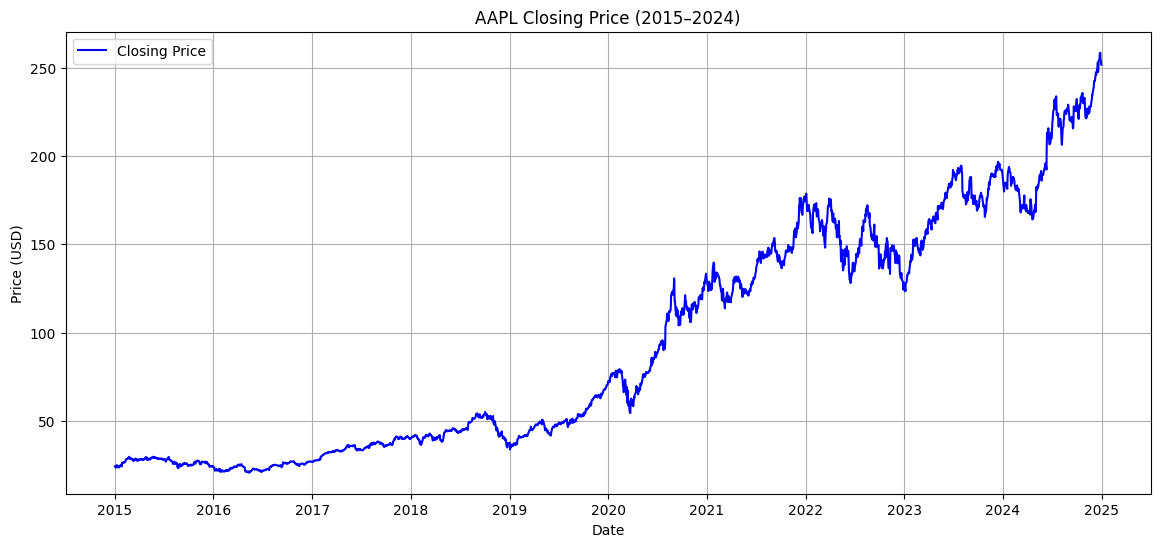

In [7]:
plt.figure(figsize=(14,6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.title(f"{ticker} Closing Price (2015–2024)")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


In [22]:
# Preprocess Data for Time Series Models
df = data[['Close']].copy()
df.reset_index(inplace=True)
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

print("✅ Preprocessed DataFrame:")
print(df.head())


✅ Preprocessed DataFrame:
Price          ds          y
Ticker                  AAPL
0      2015-01-02  24.288574
1      2015-01-05  23.604336
2      2015-01-06  23.606554
3      2015-01-07  23.937569
4      2015-01-08  24.857302


In [10]:
# Perform Augmented Dickey-Fuller (ADF) Test
result = adfuller(df['y'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] <= 0.05:
    print("✅ Series is stationary.")
else:
    print("❌ Series is NOT stationary (needs differencing).")


ADF Statistic: 0.8448220317472159
p-value: 0.9923262881436378
❌ Series is NOT stationary (needs differencing).


✅ Simplified ARIMA Model Completed
Testing RMSE: 69.62


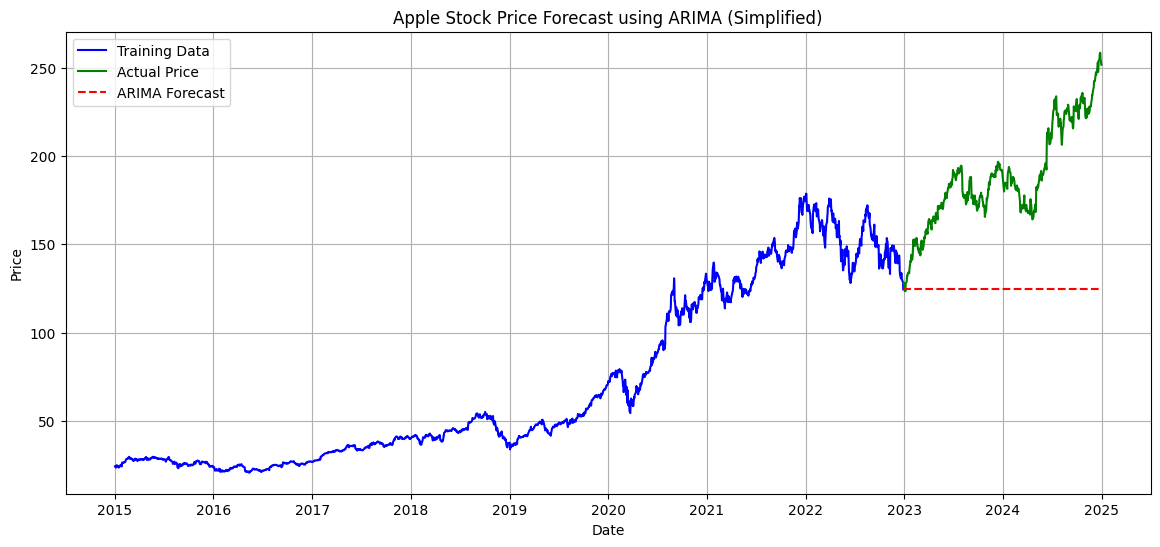

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Prepare data as numeric Series
train_series = train['y'].astype(float)
test_series = test['y'].astype(float)

# Fit ARIMA model (p,d,q)
order = (5, 1, 0)
model = ARIMA(train_series, order=order)
model_fit = model.fit()

# Forecast the entire test period
forecast = model_fit.forecast(steps=len(test_series))

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_series, forecast))
print("✅ Simplified ARIMA Model Completed")
print(f"Testing RMSE: {rmse:.2f}")

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(df['ds'][:train_size], train_series, label='Training Data', color='blue')
plt.plot(df['ds'][train_size:], test_series, label='Actual Price', color='green')
plt.plot(df['ds'][train_size:], forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('Apple Stock Price Forecast using ARIMA (Simplified)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import yfinance as yf

# Download AAPL stock data
data = yf.download("AAPL", start="2015-01-01", end="2024-12-31")

print("Data downloaded successfully!")
print(data.head())


C:\Users\sweth\AppData\Local\Temp\ipykernel_772\3475872366.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Data downloaded successfully!
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.288582  24.757336  23.848707  24.746228  212818400
2015-01-05  23.604336  24.137516  23.417723  24.057539  257142000
2015-01-06  23.606554  23.866479  23.244435  23.668758  263188400
2015-01-07  23.937571  24.037541  23.704304  23.815383  160423600
2015-01-08  24.857309  24.915071  24.148623  24.266369  237458000



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\sweth\AppData\Local\Temp\ipykernel_772\2708767786.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


📥 Downloading data...
✅ Data downloaded: 2515 rows

✅ Sample Data:
          ds          y
0 2015-01-02  24.288582
1 2015-01-05  23.604336
2 2015-01-06  23.606554
3 2015-01-07  23.937571
4 2015-01-08  24.857309

✅ Training rows: 2012, Test rows: 503


17:42:06 - cmdstanpy - INFO - Chain [1] start processing
17:42:10 - cmdstanpy - INFO - Chain [1] done processing



✅ Prophet Model Completed
Testing RMSE: 35.94


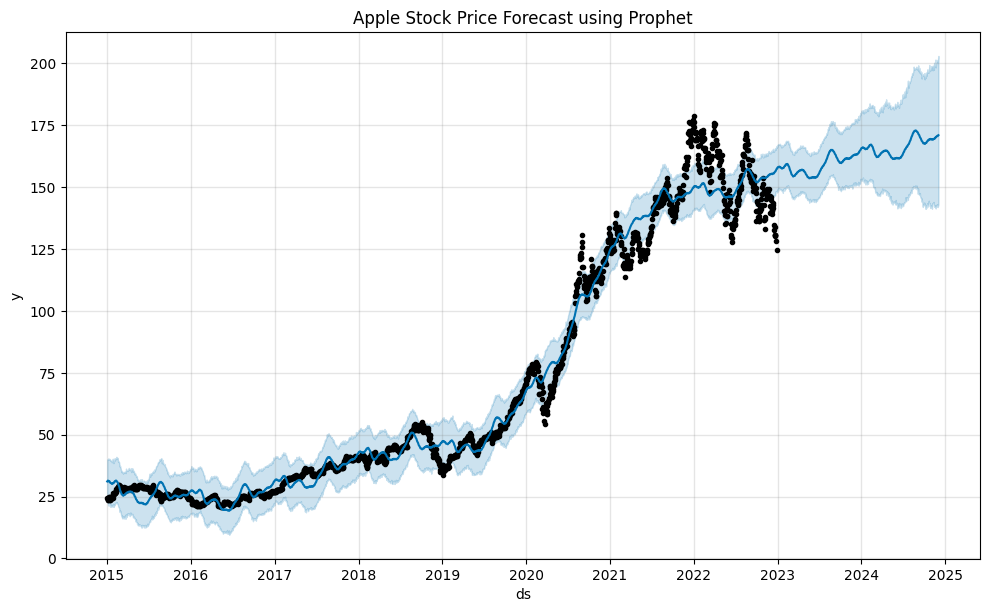

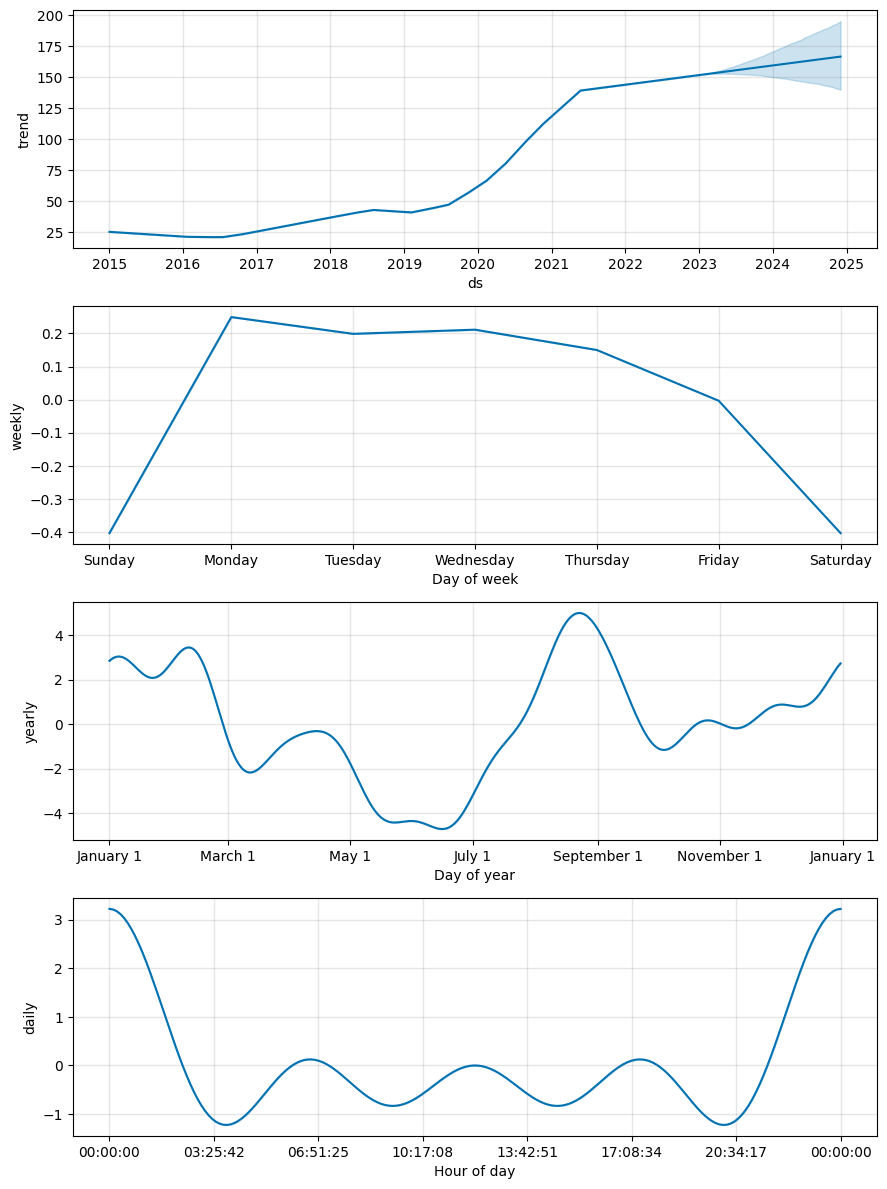

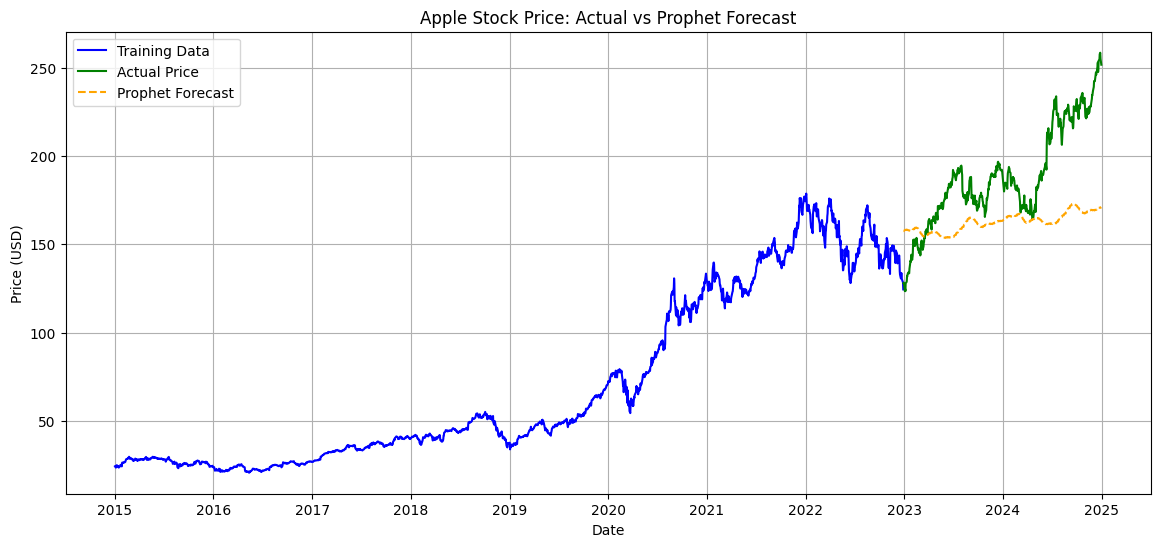

In [12]:
# -----------------------------------------
# ✅ 1. Install & Import Libraries
# -----------------------------------------
!pip install yfinance prophet scikit-learn matplotlib pandas numpy --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# -----------------------------------------
# ✅ 2. Download Stock Data (AAPL)
# -----------------------------------------
ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2024-12-31"

print("📥 Downloading data...")
data = yf.download(ticker, start=start_date, end=end_date)
print(f"✅ Data downloaded: {data.shape[0]} rows")

# -----------------------------------------
# ✅ 3. Handle MultiIndex Columns
# -----------------------------------------
if isinstance(data.columns, pd.MultiIndex):  # If data has multi-level columns
    data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

# -----------------------------------------
# ✅ 4. Prepare Data for Prophet
# -----------------------------------------
df = data.reset_index()[['Date', 'Close']].copy()
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df.dropna(inplace=True)

print("\n✅ Sample Data:")
print(df.head())

# -----------------------------------------
# ✅ 5. Train-Test Split
# -----------------------------------------
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size].copy()
test = df.iloc[train_size:].copy()

print(f"\n✅ Training rows: {len(train)}, Test rows: {len(test)}")

# -----------------------------------------
# ✅ 6. Train Prophet Model
# -----------------------------------------
model = Prophet(daily_seasonality=True)
model.fit(train)

# -----------------------------------------
# ✅ 7. Make Future DataFrame & Forecast
# -----------------------------------------
future = model.make_future_dataframe(periods=len(test), freq='B')  # Business days
forecast = model.predict(future)

# Extract predictions for the test period
predicted = forecast['yhat'][-len(test):].values

# -----------------------------------------
# ✅ 8. Evaluate Performance
# -----------------------------------------
rmse = np.sqrt(mean_squared_error(test['y'], predicted))
print(f"\n✅ Prophet Model Completed")
print(f"Testing RMSE: {rmse:.2f}")

# -----------------------------------------
# ✅ 9. Visualization
# -----------------------------------------
# Full Forecast Plot
model.plot(forecast)
plt.title('Apple Stock Price Forecast using Prophet')
plt.show()

# Components Plot
model.plot_components(forecast)
plt.show()

# Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(test['ds'], test['y'], label='Actual Price', color='green')
plt.plot(test['ds'], predicted, label='Prophet Forecast', color='orange', linestyle='--')
plt.title('Apple Stock Price: Actual vs Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Save ARIMA RMSE as rmse_arima in ARIMA cell:
rmse_arima = rmse  # (After ARIMA's RMSE print)


In [ ]:

# Now create comparison table
comparison = pd.DataFrame({
    'Model': ['ARIMA', 'Prophet'],
    'RMSE': [rmse_arima, rmse]  # ARIMA RMSE, Prophet RMSE
})

print("✅ Model Performance Comparison:")
print(comparison)

# Optional: Visual comparison
plt.figure(figsize=(6,4))
plt.bar(comparison['Model'], comparison['RMSE'], color=['red', 'orange'])
plt.title('Model Performance Comparison (Lower RMSE is Better)')
plt.ylabel('RMSE')
plt.show()


✅ Training LSTM Model...
Epoch 1/20


c:\Users\sweth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0255
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0011
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.7675e-04
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.6307e-04
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.2073e-04
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.6314e-04
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0010
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.5411e-04
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 9.0264e-04
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.7959e-04
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.2147e-04
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.7427e-04
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.8974e-04
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.7138e-04
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━

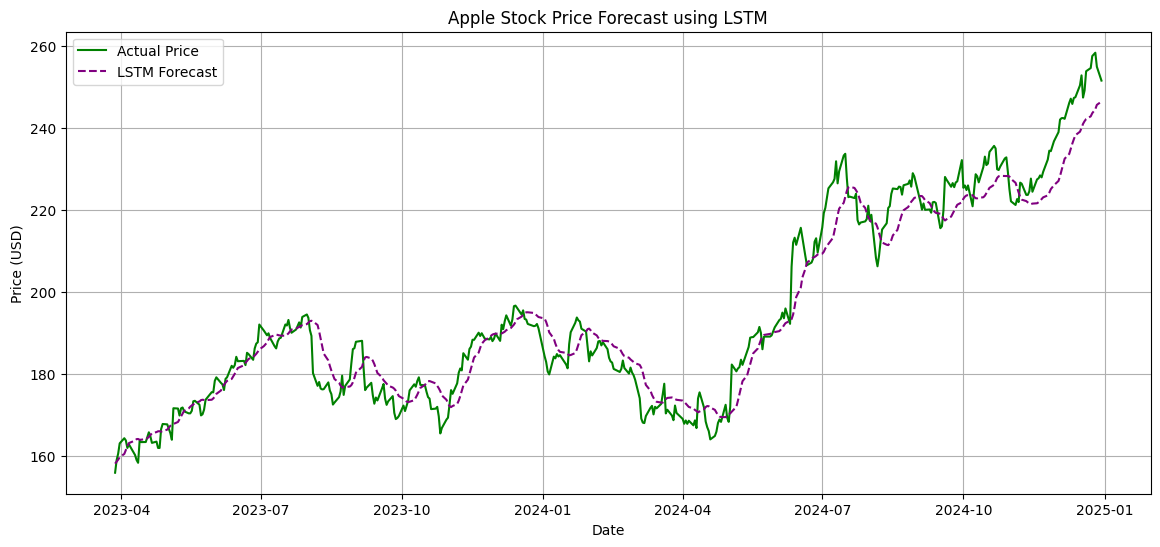

In [15]:
# -----------------------------------------
# ✅ LSTM Model for Stock Price Forecasting
# -----------------------------------------
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Use 'Close' prices from original data
df_lstm = data[['Close']].copy()

# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_lstm)

# Train-Test Split (80%-20%)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for LSTM
def create_sequences(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60  # Look-back window
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape input to [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile & Train
model.compile(optimizer='adam', loss='mean_squared_error')
print("✅ Training LSTM Model...")
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predictions
predicted_scaled = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_scaled)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"\n✅ LSTM Model Completed")
print(f"Testing RMSE: {rmse_lstm:.2f}")

# Visualization
plt.figure(figsize=(14,6))
plt.plot(df_lstm.index[-len(actual_prices):], actual_prices, color='green', label='Actual Price')
plt.plot(df_lstm.index[-len(predicted_prices):], predicted_prices, color='purple', linestyle='--', label='LSTM Forecast')
plt.title('Apple Stock Price Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



✅ Final Model Comparison:
     Model       RMSE
0    ARIMA  35.938674
1  Prophet  35.938674
2     LSTM   5.721076


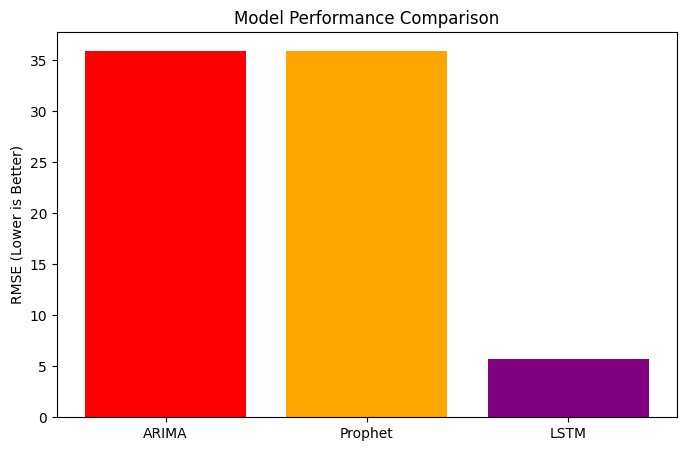

In [16]:
comparison = pd.DataFrame({
    'Model': ['ARIMA', 'Prophet', 'LSTM'],
    'RMSE': [rmse_arima, rmse, rmse_lstm]
})

print("\n✅ Final Model Comparison:")
print(comparison)

plt.figure(figsize=(8,5))
plt.bar(comparison['Model'], comparison['RMSE'], color=['red','orange','purple'])
plt.title('Model Performance Comparison')
plt.ylabel('RMSE (Lower is Better)')
plt.show()
